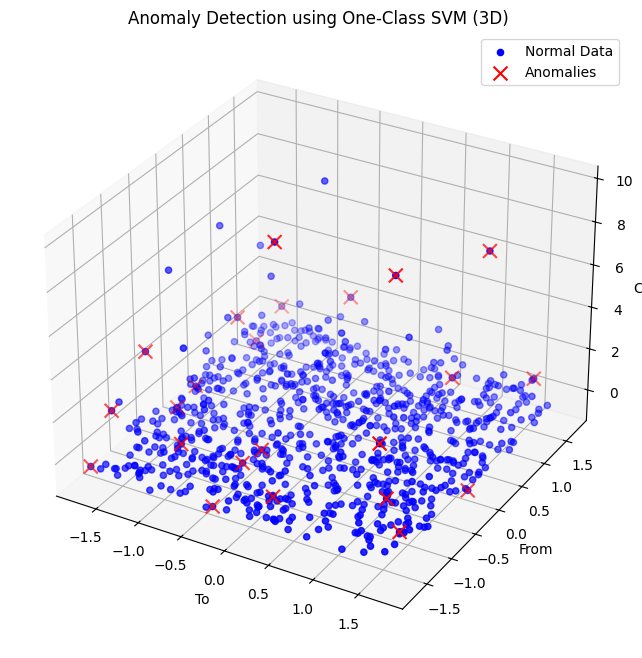

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

# Load PEMs dataset (replace 'data.csv' with your dataset file)
df = pd.read_csv('../data/PEMS07/PEMS07.csv')

# Preprocessing: Handle missing values, encode categorical variables, normalize numerical features, etc.

# Feature selection: Use 'to', 'from', and 'cost' columns
X = df[['to', 'from', 'cost']]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train one-class SVM model
svm_model = OneClassSVM(nu=0.0005)  # nu is the proportion of outliers (anomalies) expected in the data
svm_model.fit(X_scaled)

# Predict anomalies on the whole dataset
predictions = svm_model.predict(X_scaled)  # 1 for normal, -1 for anomaly

# Extract anomalies based on predictions
anomalies = X_scaled[predictions == -1]

# Visualize anomalies in 3D along with the complete data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot complete data
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c='blue', label='Normal Data')

# Plot anomalies
ax.scatter(anomalies[:, 0], anomalies[:, 1], anomalies[:, 2], c='red', marker='x', s=100, label='Anomalies')

ax.set_xlabel('To')
ax.set_ylabel('From')
ax.set_zlabel('Cost')
ax.set_title('Anomaly Detection using One-Class SVM (3D)')
ax.legend()
plt.show()
